In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 17 18:02:44 2020

@author: Arun
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
#import data
df = pd.read_csv('AttacksByCountryAndTime.csv')

#for some reason, the Unix timestamps were inflated by 1000x
df['Time'] = df['Time'].map(lambda x : x / 1000)

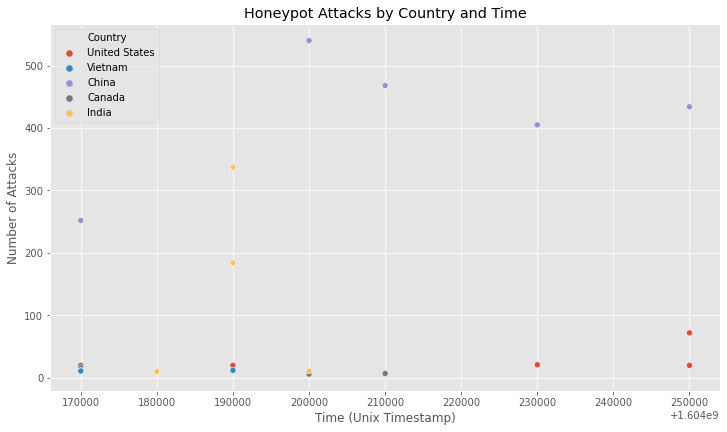

In [13]:
#Time (Unix seconds) vs Number of Attacks by Country
_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='Time',y='NumberOfAttacks',data=df,hue='Country',legend='full')
_ = plt.xlabel('Time (Unix Timestamp)')
_ = plt.ylabel('Number of Attacks')
_ = plt.title('Honeypot Attacks by Country and Time')
plt.show()

In [10]:
#train, test, split, fit KNN classifier with k=5
X_train, X_test, y_train, y_test = \
    train_test_split(df[['Time','NumberOfAttacks']],\
                     df['Country'],test_size=0.3,\
                         random_state=21,stratify=df['Country'])

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
#predict and score
y_pred = knn.predict(X_test)
print('\n')
print(y_pred)
score = knn.score(X_test,y_test)
print('\n')
print(score)
print('\n')



['Vietnam' 'India' 'Canada' 'China' 'China' 'Canada' 'Vietnam' 'China']


0.625




In [12]:
#62.5% accuracy! Let's look at the pearson correlation coefficient
rho1 = np.corrcoef(df['Time'],df['NumberOfAttacks'],rowvar=False)
print(rho1)
print('\n')

[[1.         0.28971069]
 [0.28971069 1.        ]]


